Sara Jaramillo 

### Exploring how people interpret Bayes Factors from visualizations




## Background


Communicating scientific information effectively and accurately is no easy task. We have many tools to help communicating findings including data visualization. Visualizations can be powerful and efficient, if used properly. Depending on your audience, you can adjust the amount and type of visual properties to most clearly communicate your findings. There has been a recent push from data science to include multiple layers to your visualizations. Most notably, simultaneously presenting raw data and variance in your data. These properties can be helpful in aiding interpretation, however there has been somewhat limited testing about people’s ability to comprehend graphical information. Though there is evidence that people can extract information such as means, standard, deviations, and variability (see Kramer et. al, 2017; Padilla, 2018), people fail to do so consistently. A number of studies have looked at people's interpretation of effect sizes and Bayes Factors, however researchers often use arbitrary categories (e.g., "what is the effect of study style? a) large effect b) medium effect.."). Judgments are often measured this way because they are easy to explain to lay participants. Though they have given us a broad sense of people's judgments, we lose information about their accuracy and bias. Furthermore, there is little research looking at whether people's judgments change with different styles of graphs. Most studies have assessed accuracy with just one type of graph. To our knowledge, Witt (2019) is the first researcher to ask participants to make judgments on multiple styles of graphs. She found that people tend to underestimate effects when presented with dot plots. People still underestimate when presented with bar graphs, however their judgments are overall closer to the true effect sizes they were presented with compared to the dot plots. In summary, we see two major issues in the visualization literature, 1) effect sizes have been measured using arbitrary categories and 2) these arbitrary categories make it extremely difficult to get a solid grasp on accuracy and biases in judgments. As a solution, we propose using the Bayes Factor as a measure to capture statistical judgments.





### *Uncertainty – Bayes Factors*

Some recent visualization research has shifted focus from conveying risk and probability to capturing aspects of uncertainty (Bonneau et al., 2014; Brodlie et al., 2012; Joslyn & Savelli, 2021; Hullman et al., 2020; Spiegelhalter et al., 2011; Hoekstra et al., 2014). By uncertainty, we specifically mean confidence in an estimate due to not only variability, but also sample size.

In this study participants are making judgments about Bayes Factors as a measure of uncertainty. The cognitive science community has seen a recent push for Bayesian estimation (Kruschke, 2013; Rouder et al. 2009) and although it has been found people can differentiate between effect size and confidence (Liljeholm and Cheng, 2009), there are many open questions about the relationship between peoples’ judgments on these types of questions and how accurately people can make judgments about uncertainty.


>*Note: Our study also examined an effect size measure similar to a p-value in nature. For the sake of this project, I will be focusing on Bayes Factors only.*

## Study Design 

The study used a 7 Effect Size (Cohen’s D of 0.025, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2) x 5
Sample size (16, 32, 64, 128, 256) x 3 Graph Style (Mean + 95 CI, Dot, Dot + Mean + 95 CI) fully crossed within subjects design. Thus, participants viewed 105 different graphs. We randomized the two groups in the graphs, so participants saw a mix of cases where Drug 1 was higher and lower than Drug 2. 

## Procedure
 Participants read a cover story about physicians testing whether a drug impacts the level of a chemical called CJ8 in people’s blood. Participants were then presented with three different styles of graphs in randomized blocks. At the start of each block, there were images breaking down the elements of the graph and introducing participants to what the elements mean (e.g., how to interpret confidence intervals).

Participants then viewed 35 different graphs and were asked to make a Bayes Factor judgment about each graph. The BF judgments were asked as follows, and Figure 4 shows the response options. 

>“Consider the graph above, which shows the results of a study of two new drugs. \\
>Imagine that a drug company decides to repeat the study from the graph above with the same drugs but with many thousands of participants.
>What are the chances that the average level of CJ8 of the Drug 1 group will be higher, the same, or lower than the average of the Drug 2 group in this much larger study?
>Below you can enter numbers between 1 and 998 and they must sum to 1,000.”


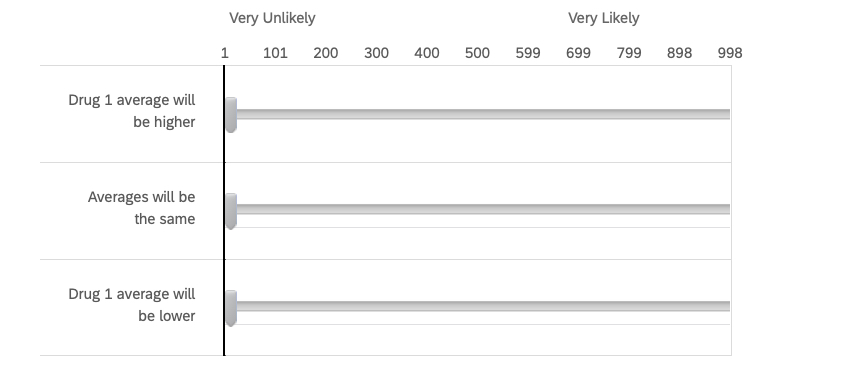



Figure 4. Response options for the Bayes Factor question.


We deliberately did not allow the BFs to include either 0 or 1 on the probability scale by requiring each response option to have at least 1 out of 1000. The reason is that if they could be 0 or 1 this would be considered as infinite evidence for one option. This would cause mathematical problems for some analyses and conceptually people should not consider any empirical evidence as infinitely strong.





## Variables

We asked participants to select their response using the slider scales. But before we could run any analyses, we had to convert the slider responses to Bayes Factors. We put three options for the sliders so that we could calculate a directional BF and a nondirectional BF. 

> Nondirectional BF: The nondirectional BF tells us information about how *certain* we are that there's a difference between two groups. In our case, since we are using the probability scale you would interpret a probability value of .5 as being very uncertain there is a difference in the averages.
> $P(Drug 1 = Drug 2) = P(Drug 1 \neq Drug 2)$ A probability value closer to 1 indicates that one is quite certain that there is a difference in averages (i.e., that the Drug 1 average is higher than Drug 2). $Drug 1 \neq Drug 2$

 

> Directional BF: The directional BF lets us test different hypotheses instead of just certainty. Here a probability value of .5 means that the averages of the two groups are similar. And a probability value around 1 means Drug 1's averages will be higher.

The sliders resulted in three columns which we then transformed to compute the directional BF and a nondirectional BF. These steps are listed below:


**Directional BF** 


1.   D BF calculated by dividing higher over lower column (odds ratio)
2.   The D BF odds ratio was log 10 transformed
3.   D BF was converted to probability by dividing the D BF over 1 + D BF odds ratio

**Nondirectional BF** 


1.   ND BF calculated by dividing the sum of higher and lower columns by the same column(odds ratio)
2.   The ND BF odds ratio was log 10 transformed
3.   ND BF was converted to probability by dividing the ND BF over 1 + ND BF odds ratio



## Hypotheses

General questions: Are directional and nondirectional BFs influenced by the style of graph? Sample size? Which of these matters more?

> _H1)_ People will have less accurate judgments for Dot Plots than Mean + CI Plots.

> _H2)_ When people are viewing Dot Plots, larger sample sizes will be more difficult to give accurate judgments about compared to Mean + CI Plots.



## Data Organization




In [1]:
# WRITE YOUR CODE HERE
require(tidyverse)
require(lme4)
require(BayesFactor)


df <- Graphs_DSPN_data %>% 
  mutate(Subject = as.factor(Subject),
         N = as.factor(N),
         CohensD = as.factor(CohensD),
         GraphType = as.factor(GraphType)) %>%
  mutate(ES_Num = rep(1:35, each = 3,times = 100)) #this is just for grouping for summary table


head(df)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lme4

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lme4’”
Loading required package: BayesFactor

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘BayesFactor’”


ERROR: ignored


## Analyses


**Part a: Mixed-Effects**




In [ ]:
#before we start, let's do some plotting
summary_DBF <- df %>%
  group_by(ES_Num,T_DBF_Flipped, GraphType) %>%
  summarise(Mean = mean(DBF_Response_Flipped),
            SE = sd(DBF_Response_Flipped)/sqrt(n()))

T_DBF <- summary_DBF %>%
  filter(GraphType == "Dot") %>%
  select(c(T_DBF_Flipped))


P <- ggplot(summary_DBF, aes(x=T_DBF_Flipped, y=Mean)) +
  geom_point(size = 3) +
  #abline(aes(intercept = 0, slope = 1))+
  geom_errorbar(aes(ymax = Mean+2*SE, ymin = Mean-2*SE, x = T_DBF_Flipped))+
  xlim(.5,1)+
  #ylim(.4,1)+
  scale_y_continuous(limits=c(.42, 1), breaks = c(.5,.6,.7,.8,.9,1))+
  facet_grid(~GraphType)+
  #scale_x_discrete(name = "Depicted Sample Size")+
  #ggtitle("CLES Responses (Prob Scale) for Dot Plot")+
  theme_bw(30)+
  theme(legend.position = "none")
P

P2 <- P +
  geom_point(data = T_DBF, aes(y = T_DBF_Flipped), color = "red", alpha = .5, size = 2.5)
P2



#plot of NDBF

summary_NDBF <- df %>%
  group_by(ES_Num,T_NDBF_Flipped, GraphType) %>%
  summarise(Mean = mean(NDBF_Response_Flipped),
            SE = sd(NDBF_Response_Flipped)/sqrt(n()))

T_NDBF <- summary_NDBF %>%
  filter(GraphType == "Dot") %>%
  select(c(T_NDBF_Flipped))


P <- ggplot(summary_NDBF, aes(x=T_NDBF_Flipped, y=Mean)) +
  geom_point(size = 3) +
  #abline(aes(intercept = 0, slope = 1))+
  geom_errorbar(aes(ymax = Mean+2*SE, ymin = Mean-2*SE, x = T_NDBF_Flipped))+
  xlim(0,1)+
  #ylim(.4,1)+
  scale_y_continuous(limits=c(0, 1), breaks = c(.2,.3,.4,.5,.6,.7,.8,.9,1))+
  facet_grid(~GraphType)+
  #scale_x_discrete(name = "Depicted Sample Size")+
  #ggtitle("CLES Responses (Prob Scale) for Dot Plot")+
  theme_bw(30)+
  theme(legend.position = "none")
P

P2 <- P +
  geom_point(data = T_NDBF, aes(y = T_NDBF_Flipped), color = "red", alpha = .5, size = 2.5)
P2



In [ ]:
#are directional and nondirectional BFs influenced by the style of graph? sample size?
df<- df %>%
  mutate(NN = case_when(str_detect(N,'16') ~ -2,
                        str_detect(N,'32') ~ -1,
                        str_detect(N,'64') ~ 0,
                        str_detect(N,'128') ~ 1,
                        str_detect(N,'256') ~ 2, TRUE ~ 6))

df$GraphType <- relevel(df$GraphType, ref= "Dot")

model_combined <- lmer(DBF_Response_Flipped ~ NN*GraphType + (1+NN*GraphType|Subject),data = df)

summary(model_combined)

#plot(model_combined)


model_combinedlog <- lmer(log10(DBF_Response_Flipped) ~ NN*GraphType + (1+NN*GraphType|Subject),data = df)

summary(model_combinedlog)

#plot(model_combinedlog)


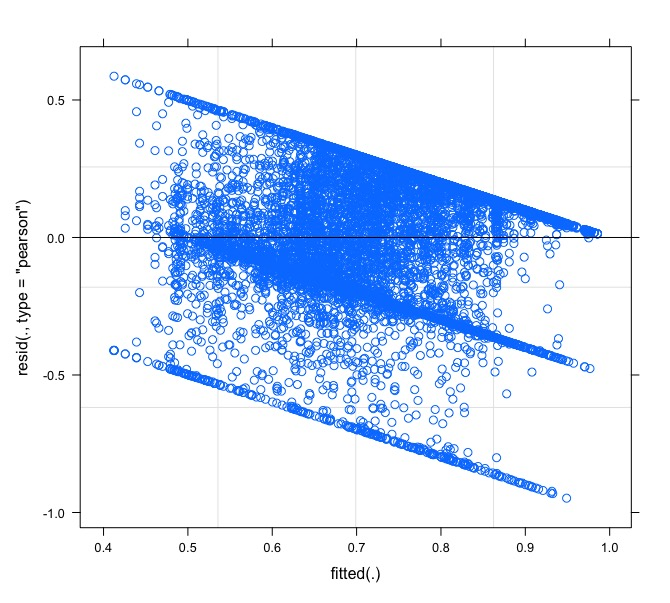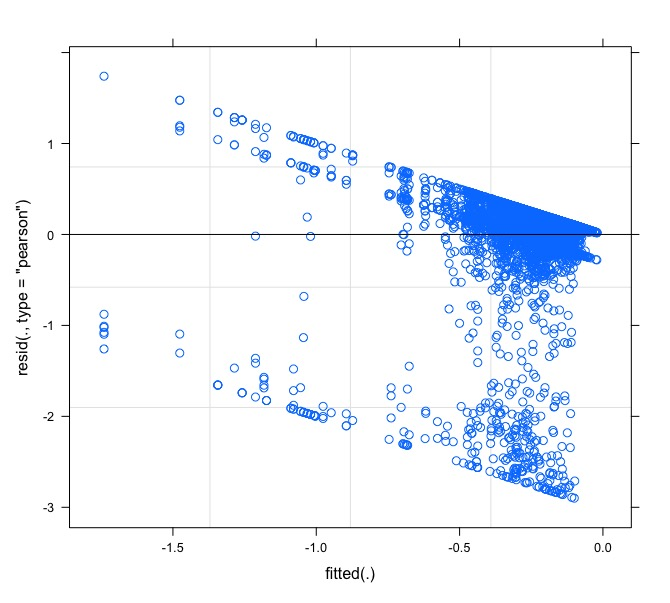

**Summary**

These results back up my theory that the data is likely nonlinear. One possibility is to follow-up with a nonlinear mixed effects model. However for my master's project I'm currently following up with a grid search. Though this method wasn't necessarily the best approach for this analysis, it is helpful because it give us some initial indicators that responses aren't linear. Prior research from Witt (2019) only used linear approaches. In a future study we are asking participants the same question she asked ("large/medium/small effect"). It could be useful to run this analysis on our data as well as reanalyse her data to look for evidence of nonlinearity.

**Part b: Computing Bayes Factors**



In [ ]:
# Classic analysis for comparison
lm_NDBF<- lm(NDBF_Response_Flipped ~ GraphType*NN, data=df)
summary(lm_NDBF)



full <- lmBF(NDBF_Response_Flipped ~ GraphType*NN , data=df) #all predictors + interaction
noInteraction <- lmBF(NDBF_Response_Flipped ~ GraphType + NN , data=df) #no interaction
onlyGraph <- lmBF(NDBF_Response_Flipped ~ GraphType, data=df) #only graph
onlyN <- lmBF(NDBF_Response_Flipped ~ NN , data=df) #only sample size

allBFs <- c(full, noInteraction, onlyGraph, onlyN)
allBFs

plot(allBFs)

full / noInteraction




# Classic analysis for comparison
lm_DBF<- lm(DBF_Response_Flipped ~ GraphType*NN, data=df)
summary(lm_DBF)



full <- lmBF(DBF_Response_Flipped ~ GraphType*NN , data=df) #all predictors + interaction
noInteraction <- lmBF(DBF_Response_Flipped ~ GraphType + NN , data=df) #no interaction
onlyGraph <- lmBF(DBF_Response_Flipped ~ GraphType, data=df) #only graph
onlyN <- lmBF(DBF_Response_Flipped ~ NN , data=df) #only sample size

allBFs <- c(full, noInteraction, onlyGraph, onlyN)
allBFs

plot(allBFs)

full / noInteraction



**Summary**

Our analyses don't show a huge difference between the interaction vs non interaction model. This is different than prior findings for a different effect size measure. To make sure these findings are solid, I'm going to move forward using backwards stepwise regression. 

**Part c: Backwards stepwise regression**



**Summary**


## Conclusions 


